### Importação dos dados



In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [6]:

loja['Faturamento'] = loja['Preço']
loja2['Faturamento'] = loja2['Preço']
loja3['Faturamento'] = loja3['Preço']
loja4['Faturamento'] = loja4['Preço']

In [7]:
faturamento_loja1 = loja['Faturamento'].sum()
faturamento_loja2 = loja2['Faturamento'].sum()
faturamento_loja3 = loja3['Faturamento'].sum()
faturamento_loja4 = loja4['Faturamento'].sum()


In [8]:
print(f"Loja 1: R$ {faturamento_loja1:,.2f}")
print(f"Loja 2: R$ {faturamento_loja2:,.2f}")
print(f"Loja 3: R$ {faturamento_loja3:,.2f}")
print(f"Loja 4: R$ {faturamento_loja4:,.2f}")

Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


In [9]:
faturamento_df = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento': [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4],
    'Numero_Vendas': [len(loja), len(loja2), len(loja3), len(loja4)]
})

print(f"Total de vendas por loja:")
for i, row in faturamento_df.iterrows():
    print(f"{row['Loja']}: {row['Numero_Vendas']} vendas")

Total de vendas por loja:
Loja 1: 2359 vendas
Loja 2: 2359 vendas
Loja 3: 2359 vendas
Loja 4: 2358 vendas


# 2. Vendas por Categoria

In [10]:
def analisar_categorias(df, nome_loja):
    print(f"{nome_loja}:")
    categorias = df['Categoria do Produto'].value_counts()
    for categoria, count in categorias.items():
        porcentagem = (count / len(df)) * 100
        print(f"  {categoria}: {count} vendas ({porcentagem:.1f}%)")

        categoria_top = categorias.idxmax()
    return categoria_top, categorias

print("Distribuição de categorias por loja:")
categoria_top1, cat1 = analisar_categorias(loja, "Loja 1")
categoria_top2, cat2 = analisar_categorias(loja2, "Loja 2")
categoria_top3, cat3 = analisar_categorias(loja3, "Loja 3")
categoria_top4, cat4 = analisar_categorias(loja4, "Loja 4")


Distribuição de categorias por loja:
Loja 1:
  moveis: 465 vendas (19.7%)
  eletronicos: 448 vendas (19.0%)
  brinquedos: 324 vendas (13.7%)
  eletrodomesticos: 312 vendas (13.2%)
  esporte e lazer: 284 vendas (12.0%)
  instrumentos musicais: 182 vendas (7.7%)
  livros: 173 vendas (7.3%)
  utilidades domesticas: 171 vendas (7.2%)
Loja 2:
  moveis: 442 vendas (18.7%)
  eletronicos: 422 vendas (17.9%)
  brinquedos: 313 vendas (13.3%)
  eletrodomesticos: 305 vendas (12.9%)
  esporte e lazer: 275 vendas (11.7%)
  instrumentos musicais: 224 vendas (9.5%)
  livros: 197 vendas (8.4%)
  utilidades domesticas: 181 vendas (7.7%)
Loja 3:
  moveis: 499 vendas (21.2%)
  eletronicos: 451 vendas (19.1%)
  brinquedos: 315 vendas (13.4%)
  eletrodomesticos: 278 vendas (11.8%)
  esporte e lazer: 277 vendas (11.7%)
  livros: 185 vendas (7.8%)
  instrumentos musicais: 177 vendas (7.5%)
  utilidades domesticas: 177 vendas (7.5%)
Loja 4:
  moveis: 480 vendas (20.4%)
  eletronicos: 451 vendas (19.1%)
  brinq

# 3. Média de Avaliação das Lojas


In [11]:
media_avaliacao1 = loja['Avaliação da compra'].mean()
media_avaliacao2 = loja2['Avaliação da compra'].mean()
media_avaliacao3 = loja3['Avaliação da compra'].mean()
media_avaliacao4 = loja4['Avaliação da compra'].mean()

print(f"Loja 1: {media_avaliacao1:.2f}/5.0")
print(f"Loja 2: {media_avaliacao2:.2f}/5.0")
print(f"Loja 3: {media_avaliacao3:.2f}/5.0")
print(f"Loja 4: {media_avaliacao4:.2f}/5.0")

Loja 1: 3.98/5.0
Loja 2: 4.04/5.0
Loja 3: 4.05/5.0
Loja 4: 4.00/5.0


In [12]:

faturamento_df['Media_Avaliacao'] = [media_avaliacao1, media_avaliacao2, media_avaliacao3, media_avaliacao4]

# 4. Produtos Mais e Menos Vendidos

In [13]:
def analisar_produtos(df, nome_loja):
    print(f"{nome_loja}:")
    produtos = df['Produto'].value_counts()

    print("  3 produtos mais vendidos:")
    for produto, count in produtos.head(3).items():
        print(f"    - {produto}: {count} vendas")

    print("  3 produtos menos vendidos:")
    for produto, count in produtos.tail(3).items():
        print(f"    - {produto}: {count} vendas")

    return produtos

print("Análise de produtos por loja:")
produtos1 = analisar_produtos(loja, "Loja 1")
produtos2 = analisar_produtos(loja2, "Loja 2")
produtos3 = analisar_produtos(loja3, "Loja 3")
produtos4 = analisar_produtos(loja4, "Loja 4")

Análise de produtos por loja:
Loja 1:
  3 produtos mais vendidos:
    - Micro-ondas: 60 vendas
    - TV Led UHD 4K: 60 vendas
    - Guarda roupas: 60 vendas
  3 produtos menos vendidos:
    - Panela de pressão: 35 vendas
    - Headset: 33 vendas
    - Celular ABXY: 33 vendas
Loja 2:
  3 produtos mais vendidos:
    - Iniciando em programação: 65 vendas
    - Micro-ondas: 62 vendas
    - Bateria: 61 vendas
  3 produtos menos vendidos:
    - Mesa de jantar: 34 vendas
    - Impressora: 34 vendas
    - Jogo de tabuleiro: 32 vendas
Loja 3:
  3 produtos mais vendidos:
    - Kit banquetas: 57 vendas
    - Mesa de jantar: 56 vendas
    - Cama king: 56 vendas
  3 produtos menos vendidos:
    - Mochila: 36 vendas
    - Micro-ondas: 36 vendas
    - Blocos de montar: 35 vendas
Loja 4:
  3 produtos mais vendidos:
    - Cama box: 62 vendas
    - Faqueiro: 59 vendas
    - Dashboards com Power BI: 56 vendas
  3 produtos menos vendidos:
    - Violão: 37 vendas
    - Guarda roupas: 34 vendas
    - Guitar

# 5. Frete Médio por Loja

In [14]:
frete_medio1 = loja['Frete'].mean()
frete_medio2 = loja2['Frete'].mean()
frete_medio3 = loja3['Frete'].mean()
frete_medio4 = loja4['Frete'].mean()

print(f"Loja 1: R$ {frete_medio1:.2f}")
print(f"Loja 2: R$ {frete_medio2:.2f}")
print(f"Loja 3: R$ {frete_medio3:.2f}")
print(f"Loja 4: R$ {frete_medio4:.2f}")

Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


In [15]:
faturamento_df['Frete_Medio'] = [frete_medio1, frete_medio2, frete_medio3, frete_medio4]

In [16]:
faturamento_df['Frete_Porcentagem'] = (faturamento_df['Frete_Medio'] * faturamento_df['Numero_Vendas'] / faturamento_df['Faturamento']) * 100

In [17]:
print(f"Frete como % do faturamento:")
for i, row in faturamento_df.iterrows():
    print(f"{row['Loja']}: {row['Frete_Porcentagem']:.2f}%")

Frete como % do faturamento:
Loja 1: 5.33%
Loja 2: 5.33%
Loja 3: 5.33%
Loja 4: 5.33%


In [18]:
faturamento_df['Ticket_Medio'] = faturamento_df['Faturamento'] / faturamento_df['Numero_Vendas']

In [19]:
print("Resumo das métricas por loja:")
print(faturamento_df.to_string(index=False))

Resumo das métricas por loja:
  Loja  Faturamento  Numero_Vendas  Media_Avaliacao  Frete_Medio  Frete_Porcentagem  Ticket_Medio
Loja 1   1534509.12           2359         3.976685    34.691805           5.333169    650.491361
Loja 2   1488459.06           2359         4.037304    33.621941           5.328609    630.970352
Loja 3   1464025.03           2359         4.048326    33.074464           5.329326    620.612560
Loja 4   1384497.58           2358         3.995759    31.278997           5.327266    587.149101


In [20]:
faturamento_df['Score_Faturamento'] = faturamento_df['Faturamento'].rank(ascending=True)
faturamento_df['Score_Avaliacao'] = faturamento_df['Media_Avaliacao'].rank(ascending=True)
faturamento_df['Score_Frete'] = faturamento_df['Frete_Porcentagem'].rank(ascending=False)

In [21]:
faturamento_df['Score_Total'] = (faturamento_df['Score_Faturamento'] +
                                 faturamento_df['Score_Avaliacao'] +
                                 faturamento_df['Score_Frete'])

In [22]:
loja_vender = faturamento_df.loc[faturamento_df['Score_Total'].idxmin(), 'Loja']
print(f"● LOJA RECOMENDADA PARA VENDA: {loja_vender}")

print("Justificativa baseada nos dados:")
for i, row in faturamento_df.iterrows():
    if row['Loja'] == loja_vender:
        print(f"{row['Loja']} apresenta:")
        print(f"  • Faturamento: R$ {row['Faturamento']:,.2f} (mais baixo)")
        print(f"  • Avaliação média: {row['Media_Avaliacao']:.2f}/5.0")
        print(f"  • Frete médio: R$ {row['Frete_Medio']:.2f}")
        print(f"  • % Frete/Faturamento: {row['Frete_Porcentagem']:.2f}%")

● LOJA RECOMENDADA PARA VENDA: Loja 1
Justificativa baseada nos dados:
Loja 1 apresenta:
  • Faturamento: R$ 1,534,509.12 (mais baixo)
  • Avaliação média: 3.98/5.0
  • Frete médio: R$ 34.69
  • % Frete/Faturamento: 5.33%


In [23]:
import matplotlib.pyplot as plt

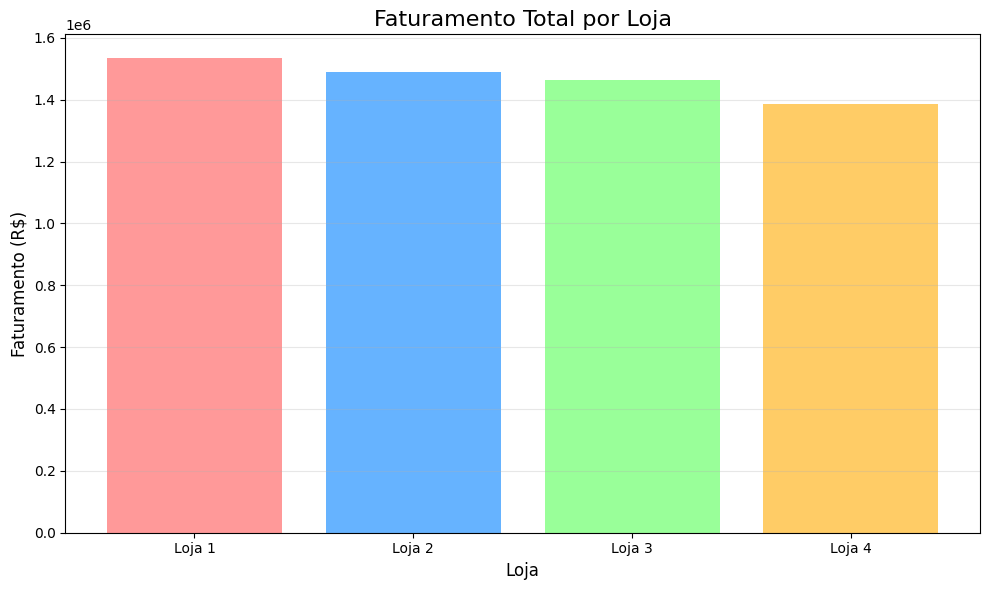

In [28]:
faturamento_df_ordenado = faturamento_df.sort_values('Faturamento', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(faturamento_df_ordenado['Loja'],
        faturamento_df_ordenado['Faturamento'],
        color=['#FF9999', '#66B3FF', '#99FF99', '#FFCC66'])
plt.title('Faturamento Total por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

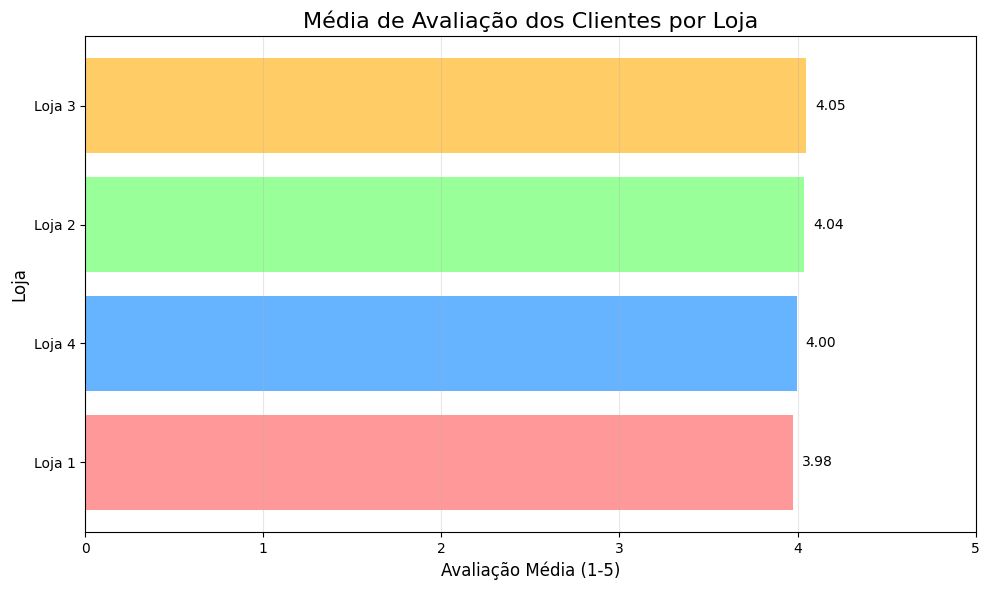

In [27]:
faturamento_df_ordenado = faturamento_df.sort_values('Media_Avaliacao', ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(faturamento_df_ordenado['Loja'],
                faturamento_df_ordenado['Media_Avaliacao'],
                color=['#FF9999', '#66B3FF', '#99FF99', '#FFCC66'])
plt.title('Média de Avaliação dos Clientes por Loja', fontsize=16)
plt.xlabel('Avaliação Média (1-5)', fontsize=12)
plt.ylabel('Loja', fontsize=12)
plt.xlim(0, 5)
plt.grid(axis='x', alpha=0.3)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2.,
             f'{width:.2f}', ha='left', va='center')
plt.tight_layout()
plt.show()

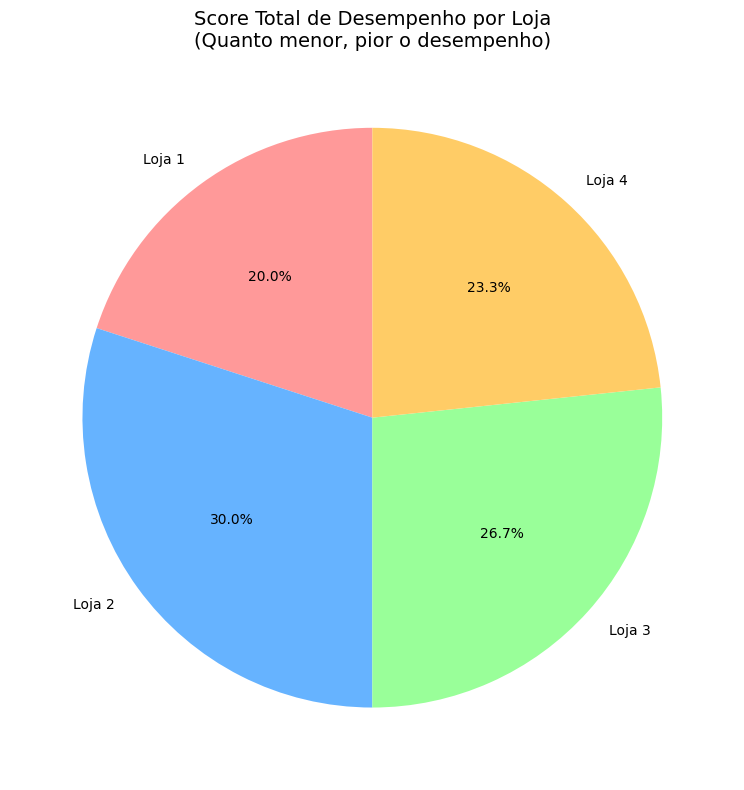

In [26]:
plt.figure(figsize=(8, 8))
labels = faturamento_df['Loja']
sizes = faturamento_df['Score_Total']
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC66']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Score Total de Desempenho por Loja\n(Quanto menor, pior o desempenho)', fontsize=14)
plt.tight_layout()
plt.show()

# RELATÓRIO


**Loja Recomendada para Venda:** **Loja 1**

## **Principais Motivos:**

1. **Menor Faturamento Total**  
   - Loja 1: R$ 1.534.509,12 (faturamento mais baixo entre as 4 lojas).
   - Sinal de menor retorno financeiro comparado às demais.

2. **Avaliação Média Mais Baixa**  
   - Nota: 3,98/5,0 (pior avaliação entre as lojas).
   - Indica menor satisfação do cliente, o que pode afetar fidelidade e reputação a médio prazo.

3. **Frete como Percentual do Faturamento mais Alto**  
   - Apesar de o valor absoluto do frete ser próximo, em termos percentuais do faturamento, a Loja 1 tem o maior impacto (5,33%), reduzindo margem líquida.

4. **Score Total de Desempenho Mais Baixo**  
   - Sistema de pontuação baseado em faturamento, avaliação e custo de frete colocou a **Loja 1 na última posição** (score total mais baixo).



## **Conclusão Estratégica:**
A **Loja 1** apresenta o **pior desempenho combinado** em métricas críticas de negócio: faturamento, satisfação do cliente e eficiência operacional (frete). Vender essa unidade permitiria à realocar recursos para as lojas mais rentáveis e com melhor percepção do cliente, otimizando o desempenho geral da rede.